In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

from road_accidents.prepare_vehicules import read_vehicules

In [3]:
vehicules = read_vehicules()

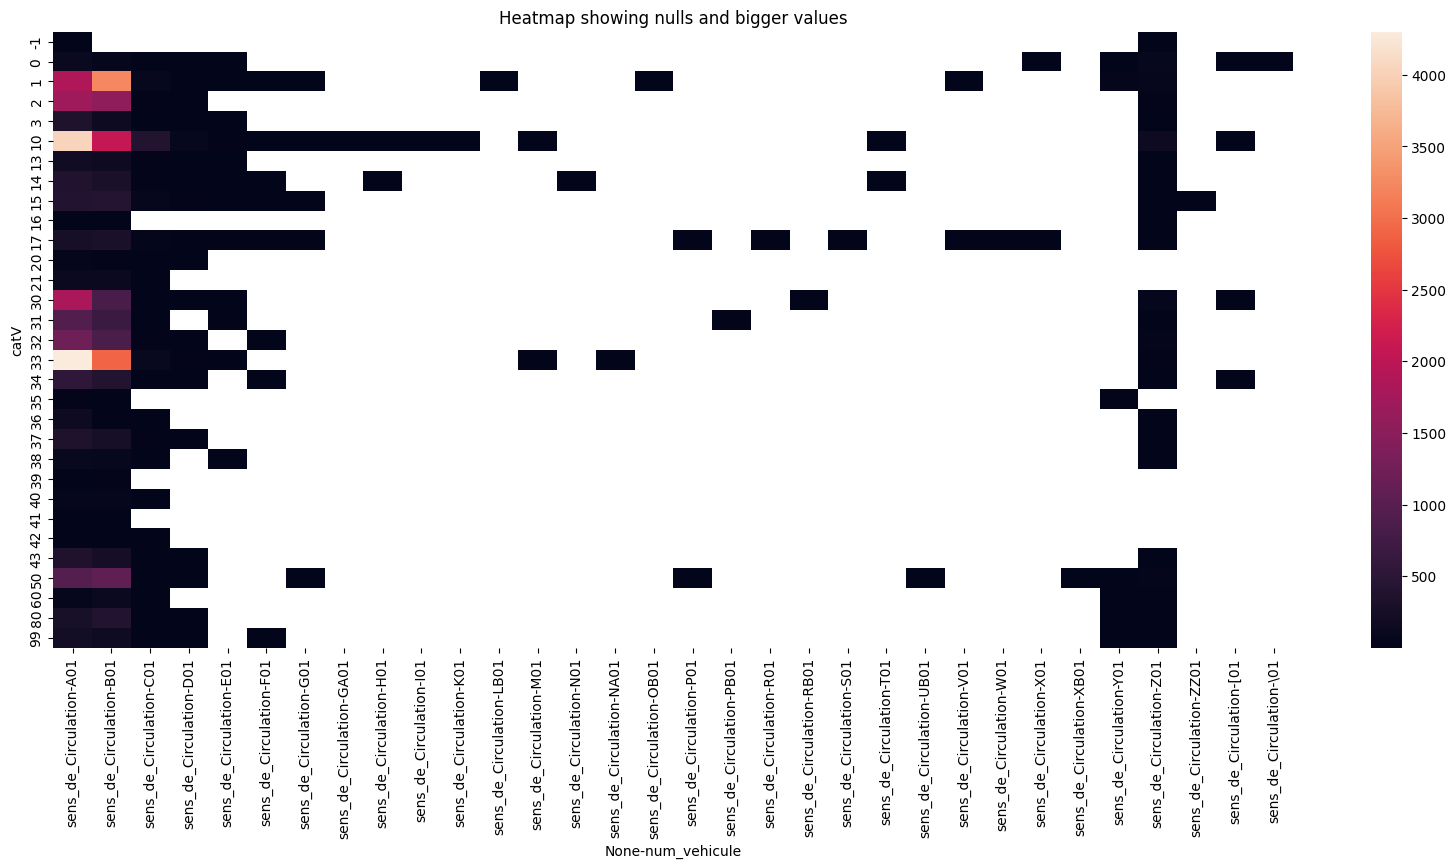

In [4]:
tab = vehicules[vehicules.catV!=7].pivot_table(index=["catV"],
                           columns= ["num_vehicule"],
                           values=["sens_de_Circulation"],
                           aggfunc="count")
tab.head() ## can't see everything, so, let's see using heatmap !

plt.figure(figsize=(20,8))
ax = sns.heatmap(tab)
ax.set_title('Heatmap showing nulls and bigger values');

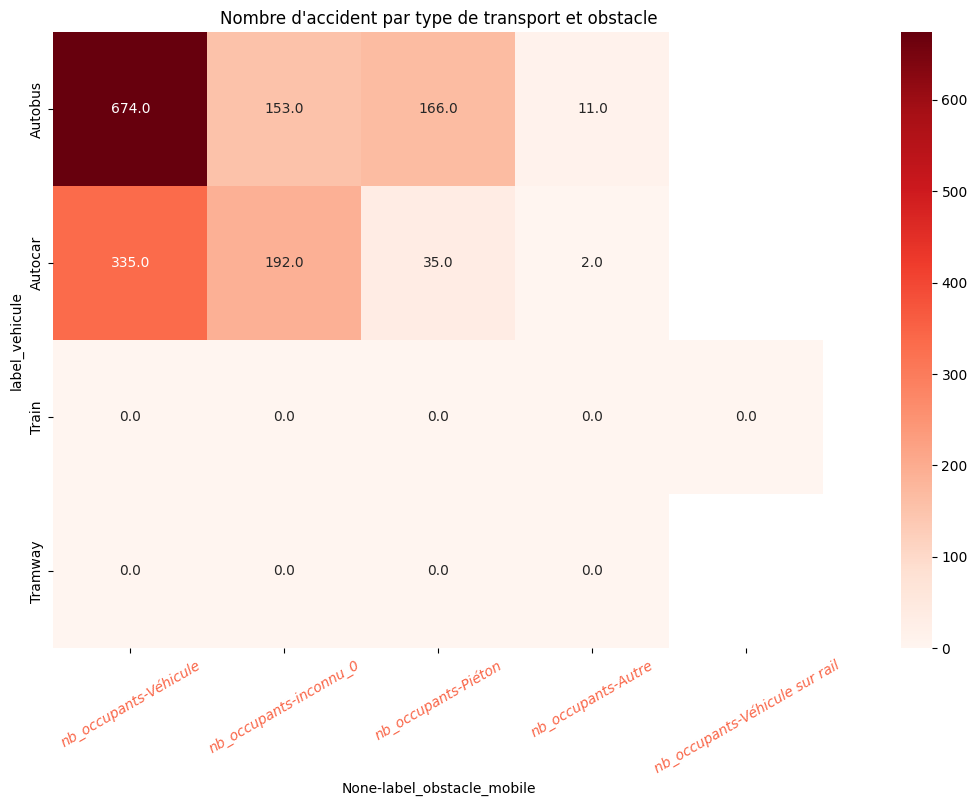

In [5]:
cat_transports_en_commun = [37, 38, 39, 40]
vehicules["transport_en_commun"] = vehicules.catV.isin(cat_transports_en_commun)
tab = vehicules[vehicules.transport_en_commun].pivot_table(index=["label_vehicule"],
                           values=["nb_occupants"],
                                 columns=["label_obstacle_mobile"],
                          aggfunc="sum")
tri = tab.sum().sort_values().index
plt.figure(figsize=(20,8))
title = "Nombre d'accident par type de transport et obstacle"
ax = sns.heatmap(tab[reversed(tri)], cmap="Reds", square=True, annot=True, fmt="", cbar=True)
ax.set_title(title)
props = {"rotation" : 30, "color":"#F96547", "fontweight":"light", "fontstyle":"italic"}
plt.setp(ax.get_xticklabels(), **props);

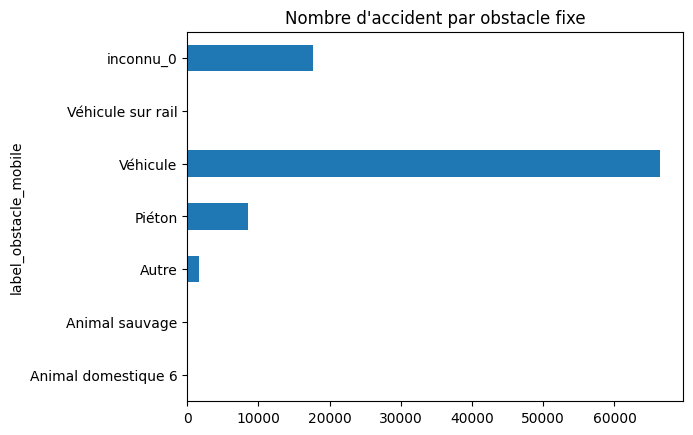

In [6]:
title = "Nombre d'accident par obstacle fixe"
to_plot = vehicules.groupby("label_obstacle_mobile")["Num_Acc"].count()
ax = to_plot.plot.barh(title=title)

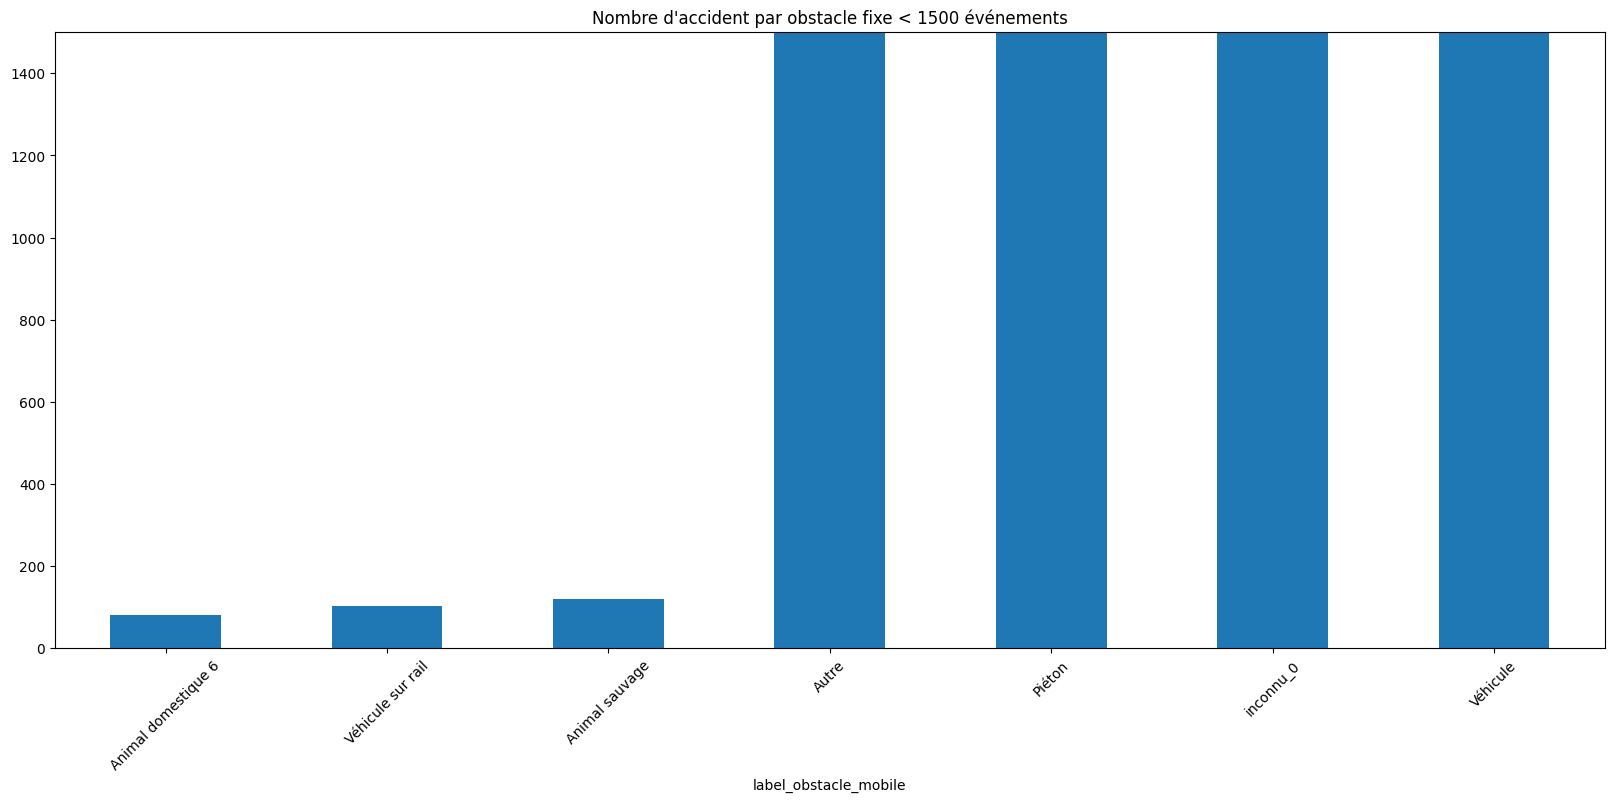

In [7]:
title = "Nombre d'accident par obstacle fixe < 1500 événements"
to_plot = vehicules.groupby("label_obstacle_mobile")["Num_Acc"].count()
#bar :
limite = 5
ax = to_plot.sort_values().plot.bar(title=title, rot=45, figsize=(20,8))
ax.set_ylim(0, 1500);

In [8]:
from road_accidents.config import CARACTERISTIQUES_PATH
caracteristiques = pd.read_csv(CARACTERISTIQUES_PATH, encoding="utf-8", sep=";")

In [9]:
caracteristiques['long'] = caracteristiques['long'].str.replace(',', '.').astype(float)
caracteristiques['lat'] = caracteristiques['lat'].str.replace(',', '.').astype(float)
caracteristiques["Num_Acc"] = caracteristiques["Accident_Id"]

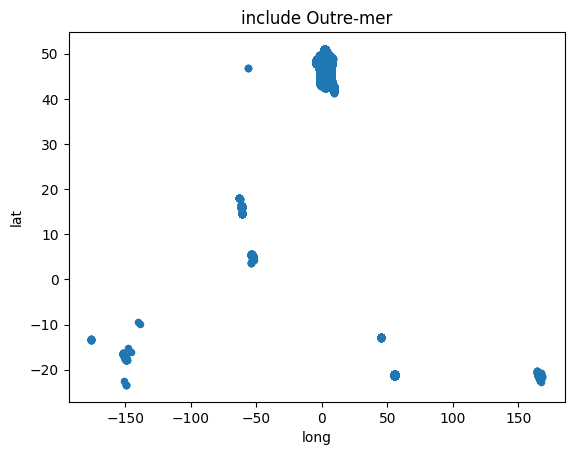

In [10]:
ax = caracteristiques.plot.scatter(x="long", y="lat")
ax.set_title('include Outre-mer');

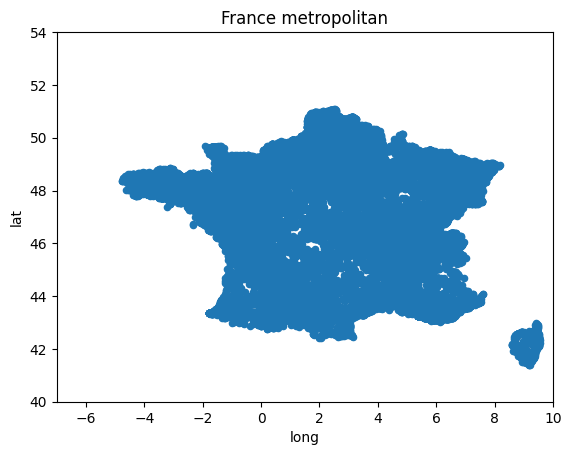

In [11]:
ax = caracteristiques.plot.scatter(x="long", y="lat")
ax.set_xlim(-7, 10)
ax.set_ylim(40, 54)
ax.set_title('France metropolitan');

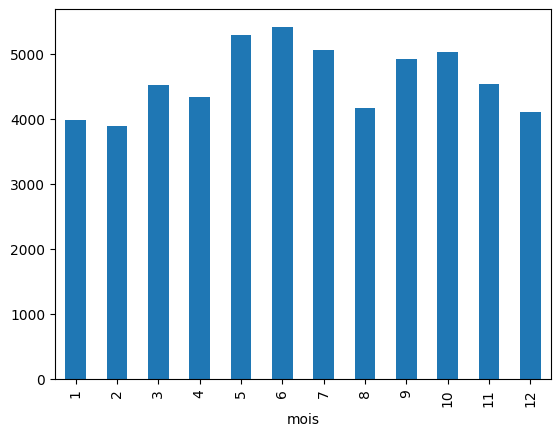

In [12]:
caracteristiques.groupby("mois")['Num_Acc'].count().plot.bar();

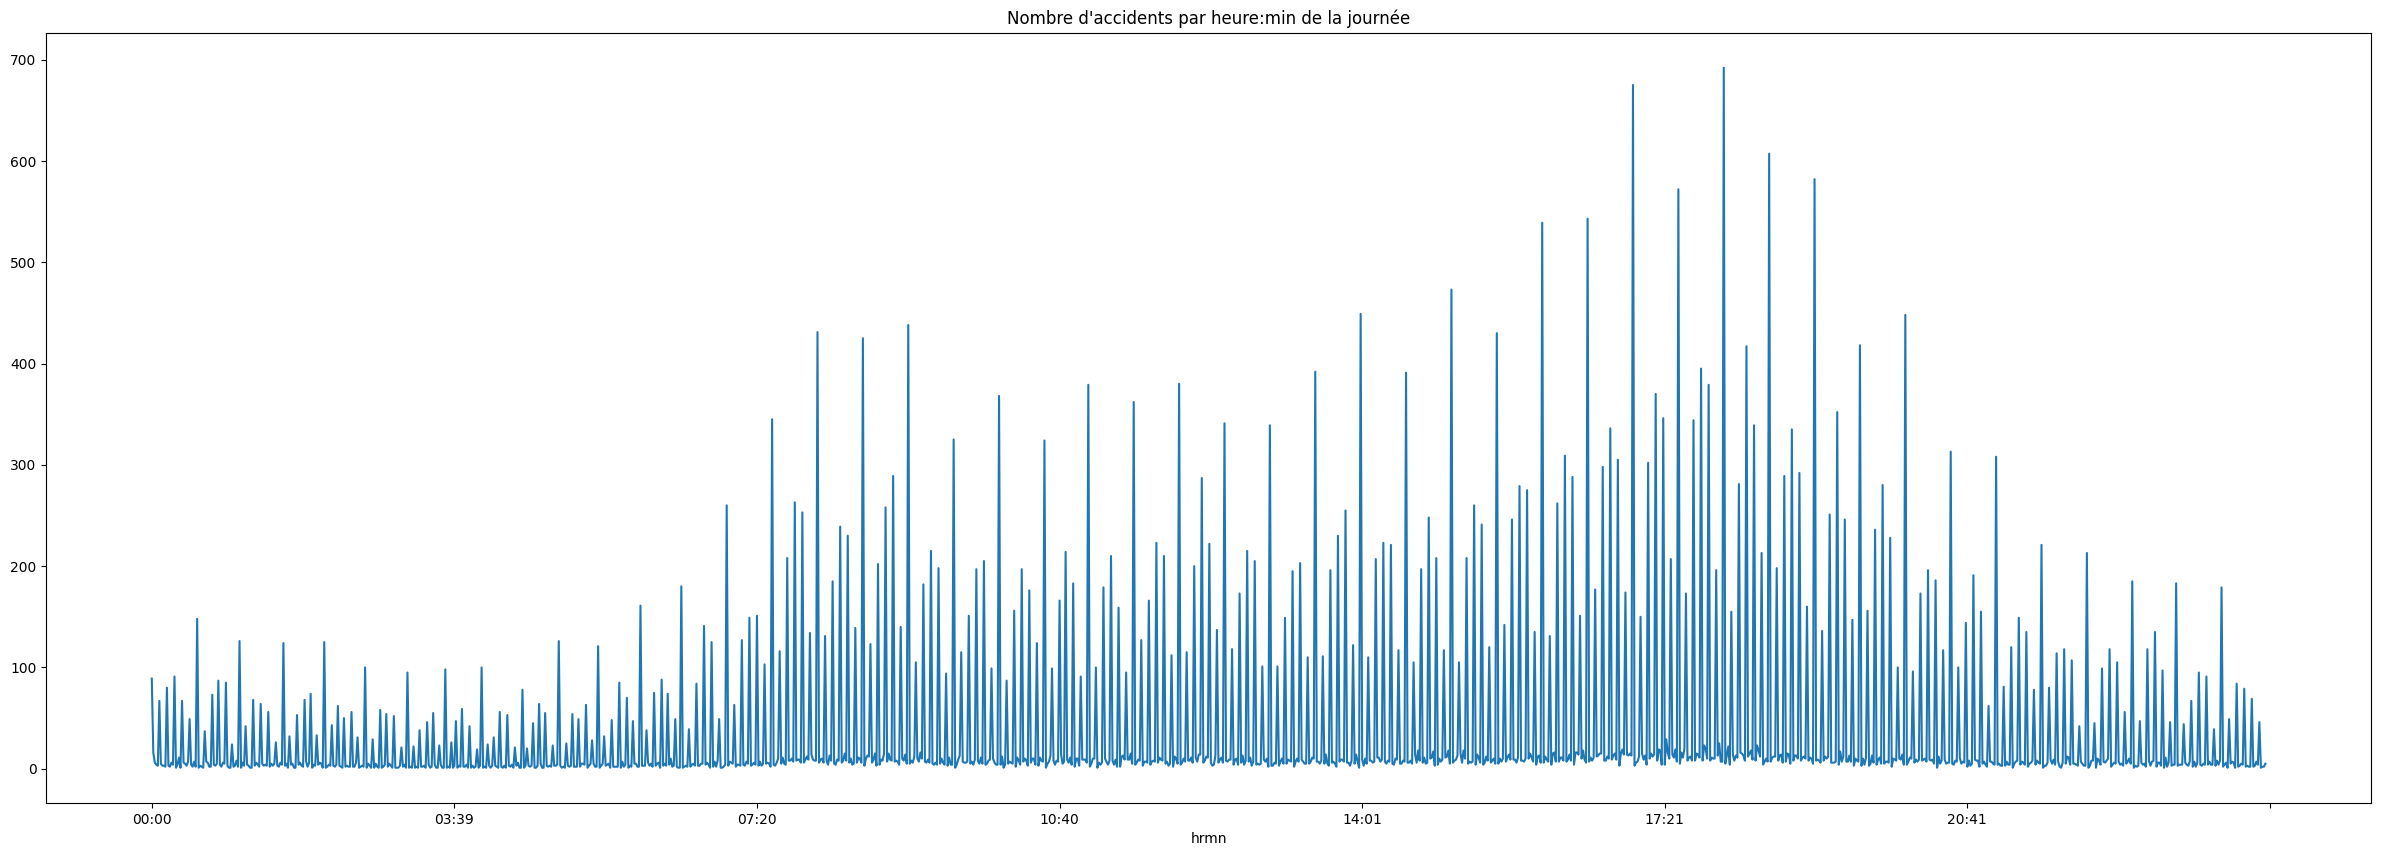

In [13]:
title = "Nombre d'accidents par heure:min de la journée"
_ = caracteristiques.groupby("hrmn")["Num_Acc"].count()
_.plot( title=title, figsize=(30,10));

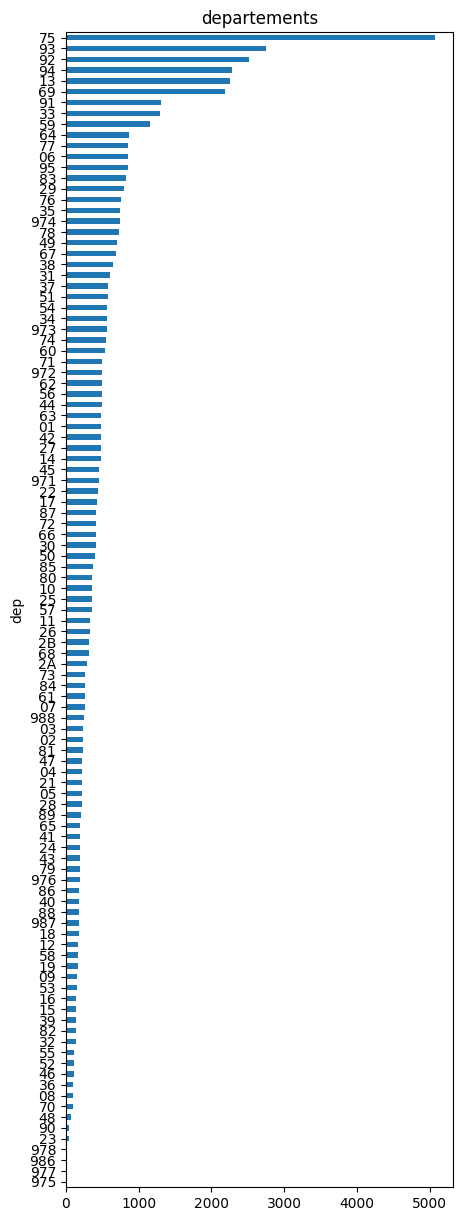

In [14]:
to_plot = caracteristiques.groupby("dep")["Num_Acc"].count().sort_values()
to_plot.plot.barh(figsize=(5,15), title='departements');

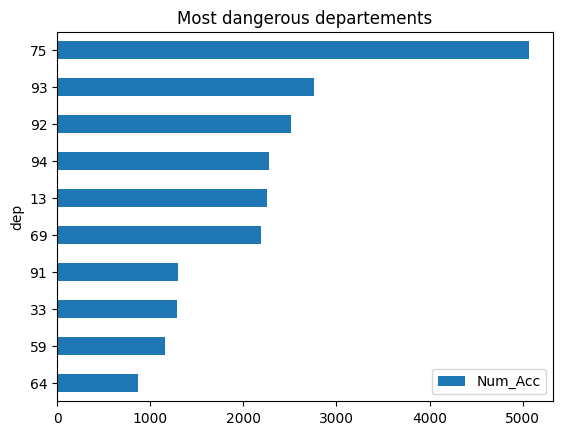

In [15]:
to_plot = caracteristiques.groupby("dep")["Num_Acc"].count().sort_values()
pd.DataFrame(to_plot).tail(n=10).plot.barh(title='Most dangerous departements');

In [16]:
from road_accidents.config import meteo_labels

In [17]:
caracteristiques['meteo'] = caracteristiques.atm.map(meteo_labels)
caracteristiques["h"] = caracteristiques.hrmn.apply(lambda x: str(x)[:2]).astype(int)
caracteristiques["m"] = caracteristiques.hrmn.apply(lambda x: str(x)[2:])
caracteristiques["period"] = np.where(
    ((caracteristiques.h > 22) & (caracteristiques.h < 24))
    | ((caracteristiques.h >= 0) & (caracteristiques.h <= 5)), "night",
         np.where((caracteristiques.h > 5) & (caracteristiques.h <= 12), "morning",
                 np.where((caracteristiques.h > 12) & (caracteristiques.h <= 17), "afternoon",
                         np.where((caracteristiques.h > 17) & (caracteristiques.h <= 22), "evening", "other"))))

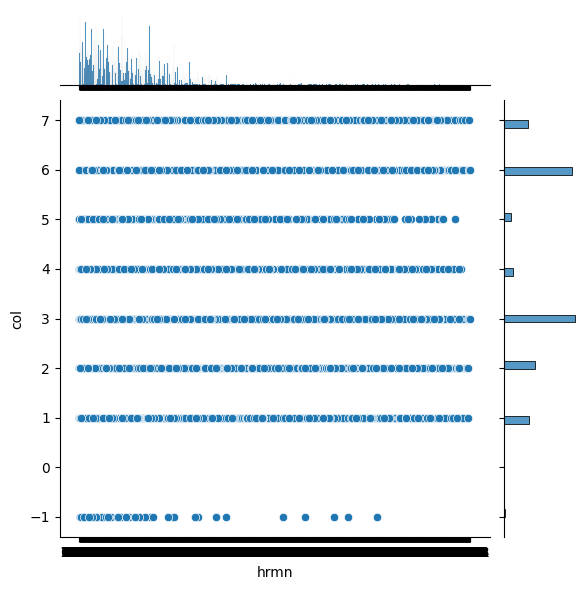

In [18]:
sns.jointplot(x='hrmn',y='col',data=caracteristiques);

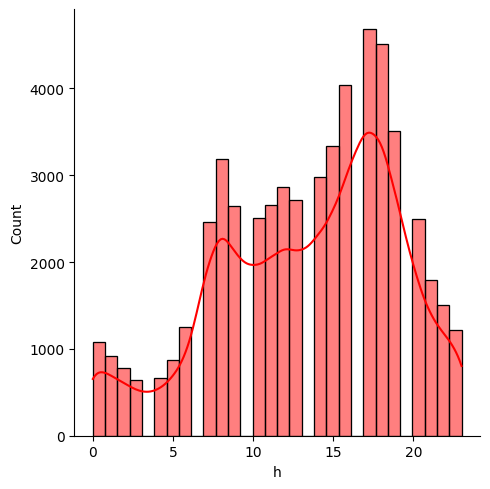

In [19]:
sns.displot(caracteristiques.h,bins=30,color='red', kde=True);

/var/folders/_v/1zbxtgq14j7cnn2b66dmp6y40000gq/T/ipykernel_41626/3979833518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='meteo',y='h',data=caracteristiques,palette='rainbow')


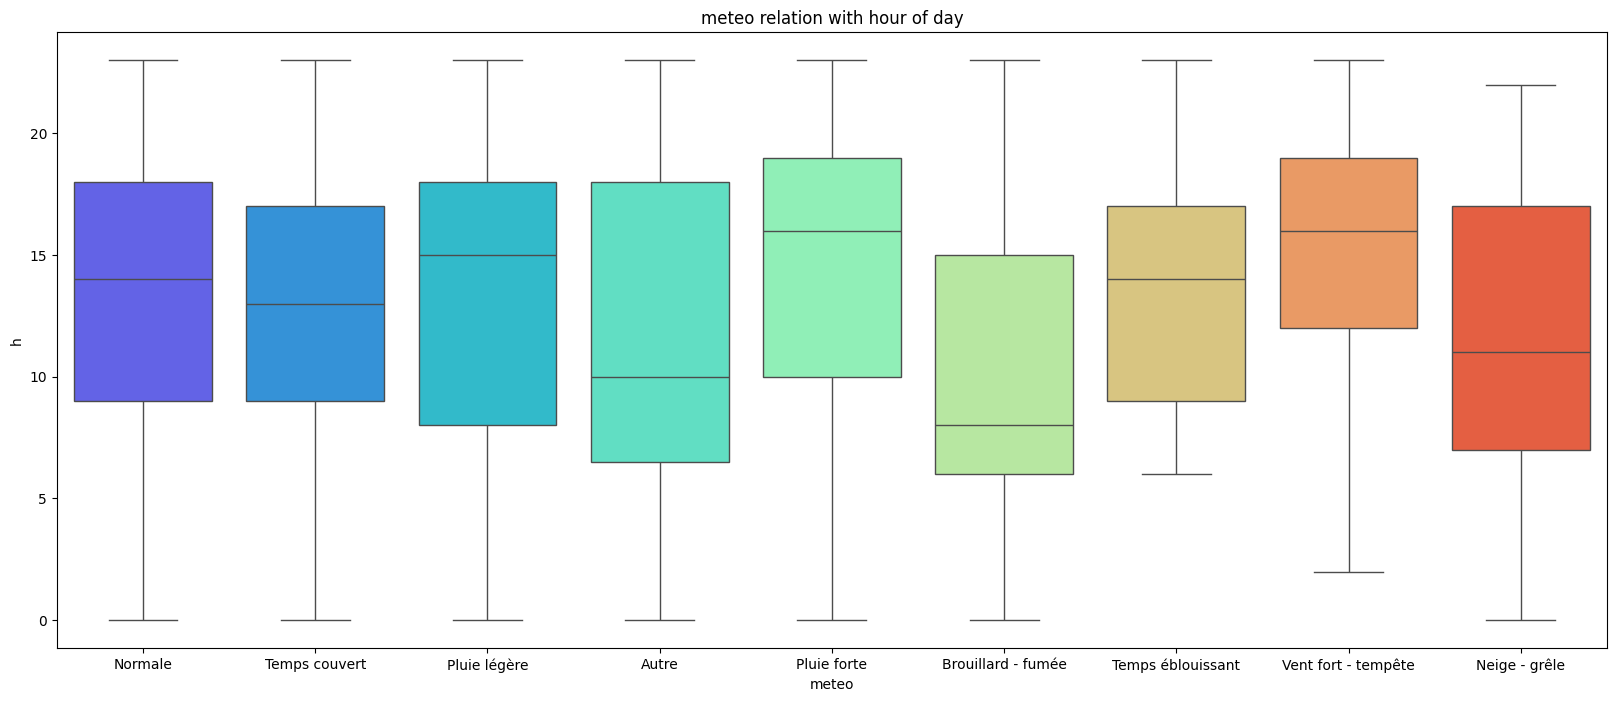

In [20]:
plt.figure(figsize=(20,8));
ax = sns.boxplot(x='meteo',y='h',data=caracteristiques,palette='rainbow')
# can use swarmplot, but takes a lot of time to perform
ax.set_title("meteo relation with hour of day");

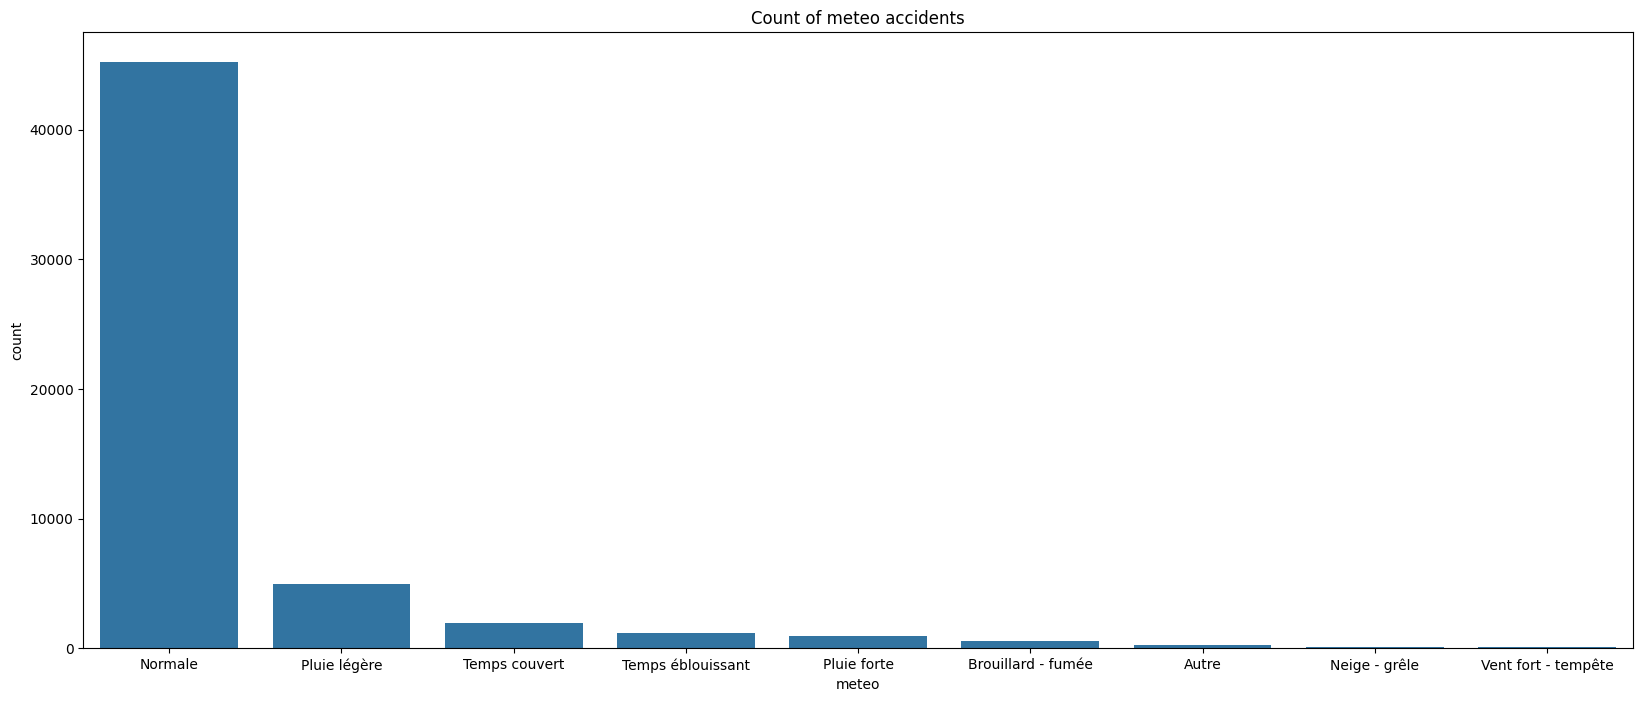

In [21]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='meteo',data=caracteristiques,
                   order = caracteristiques.meteo.value_counts().index)
ax.set_title("Count of meteo accidents");

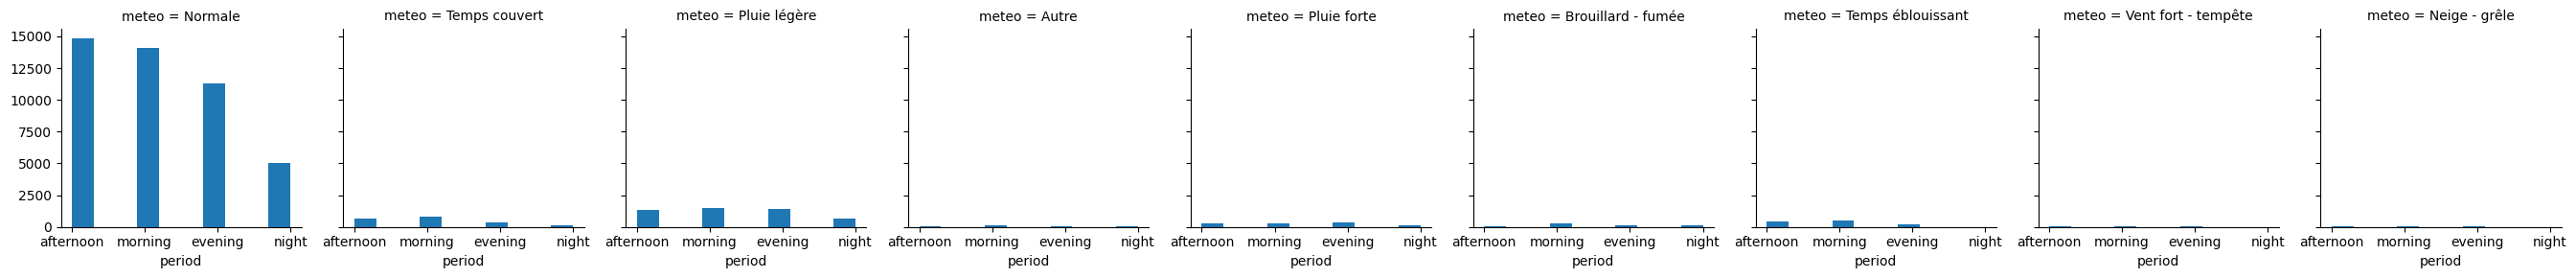

In [22]:
g = sns.FacetGrid(data=caracteristiques,col='meteo')
g.map(plt.hist,'period');

In [24]:
caracteristiques

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,Num_Acc,meteo,h,m,period
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),44.559420,4.725720,202200000001,Normale,16,:15,afternoon
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,46.925810,6.346200,202200000002,Normale,8,:34,morning
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,48.493162,-2.760439,202200000003,Normale,17,:15,afternoon
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),45.692652,-0.326290,202200000004,Temps couvert,18,:00,evening
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,43.675579,5.092703,202200000005,Normale,11,:45,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,1,1,2022,03:50,3,2B,2B293,1,1,1,6,D71,42.310165,9.478583,202200055298,Normale,3,:50,night
55298,202200055299,1,1,2022,07:20,3,84,84074,1,1,1,6,D973,43.753164,5.224476,202200055299,Normale,7,:20,morning
55299,202200055300,1,1,2022,04:27,3,74,74001,1,1,9,6,D22,46.282532,6.732806,202200055300,Autre,4,:27,night
55300,202200055301,1,1,2022,08:40,1,81,81099,1,3,1,3,Chemin Toulze,43.927265,1.915637,202200055301,Normale,8,:40,morning
